# DATA STORYTELLING: CRIME RATES IN NYC

#### The purpose of this project is to be able to understand the nature of crimes that happen in NYC in each borough. Various crimes can be confined to different boroughs. 
#### I performed some data exploration and visualization in this notebook with the hope of uncovering some interesting insights along the way. I used publicly available data to explore crime in NYC from January 2015 to February 2019. The data is available from the NYC's data portal linked below.
#### https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/data
#### Though the original audience is the NYPD cops and detectives, the audience could be anyone with minimum knowledge of thr technicalities of the code cells. There are comment in each cell codes to explain what steps I took to obtain the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

df = pd.read_csv('nyc_crime.csv')

## Clean data
- Delete unnecessary columns and fill NaN values of the columns that will be used for plots
- Convert all the date columns to datetime format. (I am still thinking of combining the date and time but I need to check what I can do to plot it.)
- Check for duplicates. check for columns .nunique() for columns for unique values 
- Separate the date and add another columns for years, months and dates

In [2]:
# Delete unnecessary columns. Columns that are not needed are: HADEVELOPT, HOUSING_PSA, JURISDICTION_CODE, JURIS_DESC, LOC_OF_OCCUR_DESC, PARKS_NM, STATION_NAME, TRANSIT_DISTRICT.
df.drop(['HADEVELOPT', 'HOUSING_PSA', 'PREM_TYP_DESC', 'JURISDICTION_CODE', 'JURIS_DESC', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'STATION_NAME', 'TRANSIT_DISTRICT'], axis=1, inplace=True)

In [3]:
# Rename columns.
df = df.rename(columns={"BORO_NM": "BOROUGH", "CMPLNT_FR_DT": "DATE", "CMPLNT_FR_TM": "TIME", "LAW_CAT_CD": "OFFENSE LEVEL", "ADDR_PCT_CD": "PRECINT", "PD_DESC": "OFFENSE_NAME"})

# Fill in NaN values on BORO_NM
df["BOROUGH"].fillna("UNKNOWN", inplace = True) 

In [4]:
# Change the dates to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'], errors='coerce')
df['RPT_DT'] = pd.to_datetime(df['RPT_DT'], errors='coerce')
df.head()

,CMPLNT_NUM,PRECINT,BOROUGH,DATE,TIME,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,KY_CD,OFFENSE LEVEL,...,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,314773184,48,BRONX,2019-12-31,18:00:00,NaT,NaN,COMPLETED,105,FELONY,...,UNKNOWN,U,45-64,WHITE HISPANIC,F,1016990,244612,40.838026,-73.881681,"(40.838026269000075, -73.88168118799997)"
1,289837961,25,MANHATTAN,2019-12-30,20:30:00,2019-12-31,10:00:00,COMPLETED,341,MISDEMEANOR,...,NaN,NaN,25-44,WHITE HISPANIC,F,999296,230862,40.800334,-73.945657,"(40.800334261000046, -73.94565697199994)"
2,535744284,77,BROOKLYN,2019-12-24,16:55:00,2019-12-24,17:00:00,COMPLETED,106,FELONY,...,BLACK,M,18-24,WHITE,M,1001068,183317,40.669832,-73.939376,"(40.66983179600004, -73.93937555099996)"
3,895678119,52,BRONX,2019-12-30,19:32:00,NaT,NaN,COMPLETED,341,MISDEMEANOR,...,WHITE,F,UNKNOWN,UNKNOWN,D,1009690,257590,40.873671,-73.908014,"(40.87367103500002, -73.90801364899994)"
4,299841674,18,MANHATTAN,2019-12-30,15:30:00,2019-12-30,16:50:00,COMPLETED,341,MISDEMEANOR,...,NaN,NaN,25-44,WHITE HISPANIC,M,985766,216503,40.760935,-73.994529,"(40.76093528000007, -73.99452906599998)"


In [5]:
# Add Columns for Hour, Day, Weekday, Month, Year
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day
df['WEEKDAY'] = df['DATE'].dt.dayofweek

#Sort By Date in descending order
df = df.sort_values('DATE')
df.head()

,CMPLNT_NUM,PRECINT,BOROUGH,DATE,TIME,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,KY_CD,OFFENSE LEVEL,...,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY,WEEKDAY
125688,863566396,100,QUEENS,2015-01-01,0:00:00,2019-07-21,11:26:00,COMPLETED,126,FELONY,...,M,1035212,152992,40.586466,-73.816522,"(40.58646552900007, -73.81652172299994)",2015,1,1,3
436147,780908649,42,BRONX,2015-01-01,0:00:00,2015-12-31,23:59:00,COMPLETED,116,FELONY,...,F,1008798,238971,40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",2015,1,1,3
312163,996127336,50,BRONX,2015-01-01,0:00:00,NaT,NaN,COMPLETED,233,MISDEMEANOR,...,F,1011257,261130,40.883383,-73.902333,"(40.883382579000056, -73.90233330899997)",2015,1,1,3
311798,160752445,18,MANHATTAN,2015-01-01,0:00:00,NaT,NaN,COMPLETED,578,VIOLATION,...,F,987959,217674,40.764149,-73.986612,"(40.76414872600003, -73.98661223299997)",2015,1,1,3
360886,990576089,66,BROOKLYN,2015-01-01,0:01:00,2016-10-25,0:01:00,COMPLETED,109,FELONY,...,F,985162,169652,40.632340,-73.996716,"(40.63234026100001, -73.99671569099996)",2015,1,1,3


In [6]:
# Check that each COMPLAINT NUM is unique
CN_unique = df['CMPLNT_NUM'].nunique()
CN_unique

460745

## Plot total crimes each year in Queens 
### We need to see to inspect and visualize our entire data.

In [7]:
# Create a subset dataframe by combining columns
date_and_borough_df = df[['DATE', 'BOROUGH']]
date_and_borough_df

,DATE,BOROUGH
125688,2015-01-01,QUEENS
436147,2015-01-01,BRONX
312163,2015-01-01,BRONX
311798,2015-01-01,MANHATTAN
360886,2015-01-01,BROOKLYN
...,...,...
6890,2019-12-31,BROOKLYN
2552,2019-12-31,BRONX
6880,2019-12-31,BROOKLYN
10995,2019-12-31,STATEN ISLAND


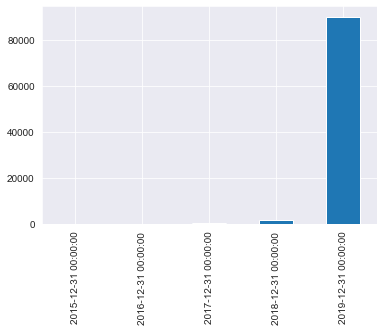

In [8]:
# Plot Queens Crime Frequency by Date 

#Create the filter
queens = date_and_borough_df[date_and_borough_df['BOROUGH'] == 'QUEENS']

# Count the sum of occurences for each date
queens_date_count = queens.DATE.value_counts()

# Use resample to organize it into Yearly sums
queens_date_count = queens_date_count.resample(rule='Y').apply('sum')
queens_date_count

#Plot 
queens_date_count.plot(kind='bar')

#### There are fewer recorded crimes from 2015 to 2018 because NYC OpenData and NYPD Database did not merge until 2017. Because of this, there are way fewer data in those years that it will make our graphs different since it will consider years 2015 to 2018 as outliers of 2019. For better visualization, it will be better if we focus on crime records in 2019.

In [9]:
#filter only 2019 dates from df
df_2019 = df[df['DATE'].dt.year == 2019]
df_2019.head()

,CMPLNT_NUM,PRECINT,BOROUGH,DATE,TIME,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,KY_CD,OFFENSE LEVEL,...,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,YEAR,MONTH,DAY,WEEKDAY
460182,900735981,105,QUEENS,2019-01-01,15:00:00,2019-01-01,15:05:00,COMPLETED,578,VIOLATION,...,F,1056264,205572,40.730639,-73.740167,"(40.730639403000055, -73.74016656399994)",2019,1,1,1
460184,495588128,44,BRONX,2019-01-01,18:35:00,2019-01-01,18:45:00,COMPLETED,121,FELONY,...,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1,1
455749,876271073,88,BROOKLYN,2019-01-01,1:00:00,2019-01-01,11:00:00,COMPLETED,109,FELONY,...,F,990026,189746,40.687492,-73.979174,"(40.687492038000066, -73.97917448199998)",2019,1,1,1
449662,394629573,44,BRONX,2019-01-01,15:15:00,NaT,NaN,COMPLETED,121,FELONY,...,E,1004749,240880,40.827820,-73.925931,"(40.827819901000055, -73.92593075599996)",2019,1,1,1
460185,579035297,18,MANHATTAN,2019-01-01,2:10:00,2019-01-01,2:30:00,COMPLETED,106,FELONY,...,M,987374,217550,40.763809,-73.988724,"(40.763808604000076, -73.98872409799998)",2019,1,1,1


## Display amount of Crimes per borough in the data set

BROOKLYN         129370
MANHATTAN        113650
BRONX             99002
QUEENS            90147
STATEN ISLAND     18510
UNKNOWN             299
Name: BOROUGH, dtype: int64

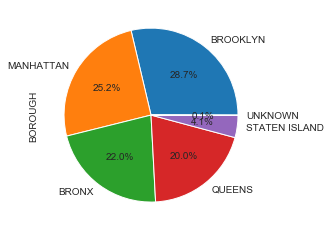

In [10]:
borough_count = df_2019.BOROUGH.value_counts()
borough_count.plot(kind='pie', y = 'BOROUGH', shadow=False,autopct='%1.1f%%', legend = False)
borough_count

#### We counted the ratio of crime in each borough to the total crimes reported and did a pie plot. Highest crime frequency happened in Brooklyn but not too far of a difference to Manhattan, Bronx, and Queens.

## Plot frequency of crimes for each borough in 2019

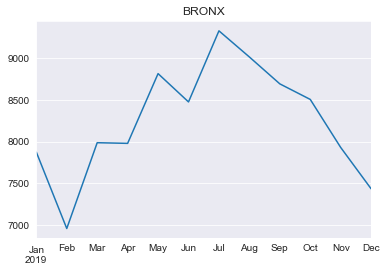

In [11]:
#Plot Bronx in 2019

#create subset df with only 2 columns
boro_2019 = df_2019[['DATE', 'BOROUGH']]

#Create the filter
bronx = boro_2019[boro_2019['BOROUGH'] == 'BRONX']

# Count the sum of occurences for each date
bronx = bronx.DATE.value_counts()

# Use resample to organize it into Yearly sums
bronx = bronx.resample(rule='M').apply('sum')

# Plot
bronx.plot(kind='line', title = "BRONX")


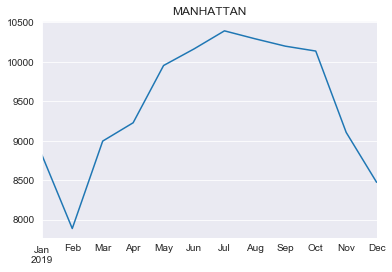

In [12]:
#Plot Manhattan in 2019
manhattan = boro_2019[boro_2019['BOROUGH'] == 'MANHATTAN']
manhattan = manhattan.DATE.value_counts()
manhattan = manhattan.resample(rule='M').apply('sum')
manhattan.plot(kind='line', title="MANHATTAN")

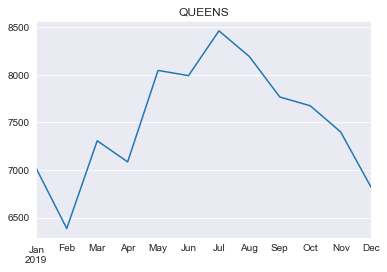

In [13]:
# Plot Queens Crime Frequency by Date 
queens = boro_2019[boro_2019['BOROUGH'] == 'QUEENS']
queens = queens.DATE.value_counts()
queens = queens.resample(rule='M').apply('sum')
queens.plot(kind='line', title="QUEENS")

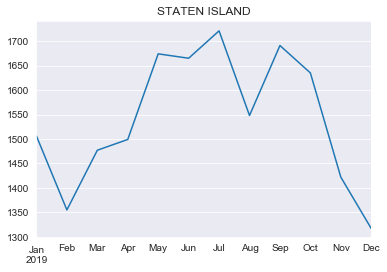

In [14]:
# Plot Staten Island Crime Frequecy by Date

staten_island = boro_2019[boro_2019['BOROUGH'] == 'STATEN ISLAND']
staten_island = staten_island.DATE.value_counts()
staten_island = staten_island.resample(rule='M').apply('sum')
staten_island.plot(kind='line', title="STATEN ISLAND")

#### All boroughs have a noticeable drop rate in February. Summer seems to be the peak season for crimes, starting in May and the highest and dropping starts in October. The highest crime reported happened in July and lowest are February  and December.

## Get the frequency of top 10 districts with most crimes (will this be possible if I make map out of this?)

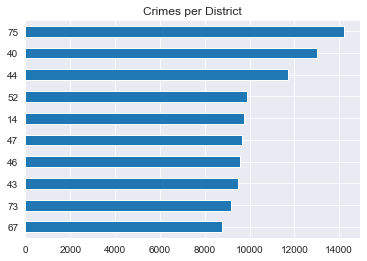

In [15]:
# Get the top 10 precints with high frequency
district = df.PRECINT.value_counts().head(10)

# Sort in descending order
district = district[::-1]
district

# Plot using horizontal bar chart
district.plot(kind='barh', title="Crimes per District")

#### The top dictrict with most crimes is Disrict 75, in Manhattan and the following districts are in Brooklyn.



## Plot the frequency of top 10 crimes committed
#### Same step as the top 10 district with most crimes

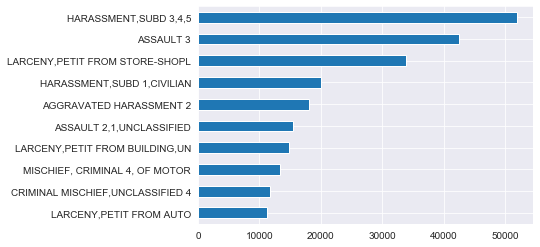

In [16]:
# Get the top 10 precints with high frequency
crime_ = df.OFFENSE_NAME.value_counts().head(10)

# Sort in descending order
crime_= crime_[::-1]

# Plot using horizontal bar chart
crime_.plot(kind='barh')

#### The top 10 most reported crime are violent crime. Studies have shown that victims will most likeley to report a crime if it is violent and theft/larcery.

## SNS Heatmap of crimes per month for each borough (TBD with Ana)

In [18]:
keep_cols = ["DATE", "PRECINT", "MONTH"]

# Use only 3 subcolumns of the entire dataframe
df_precincts = df_2019[keep_cols].sort_values('PRECINT')
df_precincts


# df = pd.pivot_table(data=sns.load_dataset("keep_cols"),
#                     index='MONTH',
#                     values='passengers',
#                     columns='year')

,DATE,PRECINT,MONTH
417471,2019-02-16,1,2
167513,2019-08-26,1,8
32549,2019-12-03,1,12
10258,2019-12-23,1,12
391366,2019-03-04,1,3
...,...,...,...
65963,2019-10-31,123,10
267035,2019-06-03,123,6
197262,2019-07-26,123,7
292503,2019-05-25,123,5


In [27]:
# This works for the heatmap for some reason I don't know
# TODO: Ask Ana what is going on here?
corr = df_2019.groupby(['PRECINT', 'MONTH']).count().DATE.unstack()
corr

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
PRECINT,,,,,,,,,,,,
1,517,455,536,506,542,578,576,623,635,573,508,437
5,354,373,397,369,357,405,438,433,398,373,348,336
6,344,276,318,350,437,488,490,532,523,493,432,391
7,337,286,327,320,388,360,353,377,363,347,337,319
9,355,312,369,393,419,387,425,413,485,433,420,407
...,...,...,...,...,...,...,...,...,...,...,...,...
115,556,568,569,541,624,642,673,675,657,637,645,526
120,526,517,555,596,612,583,621,559,561,631,479,475
121,471,374,413,397,460,468,523,462,557,490,440,446


Text(0.5, 1, 'CRIME REPORTS vs PRECINCT vs MONTH')

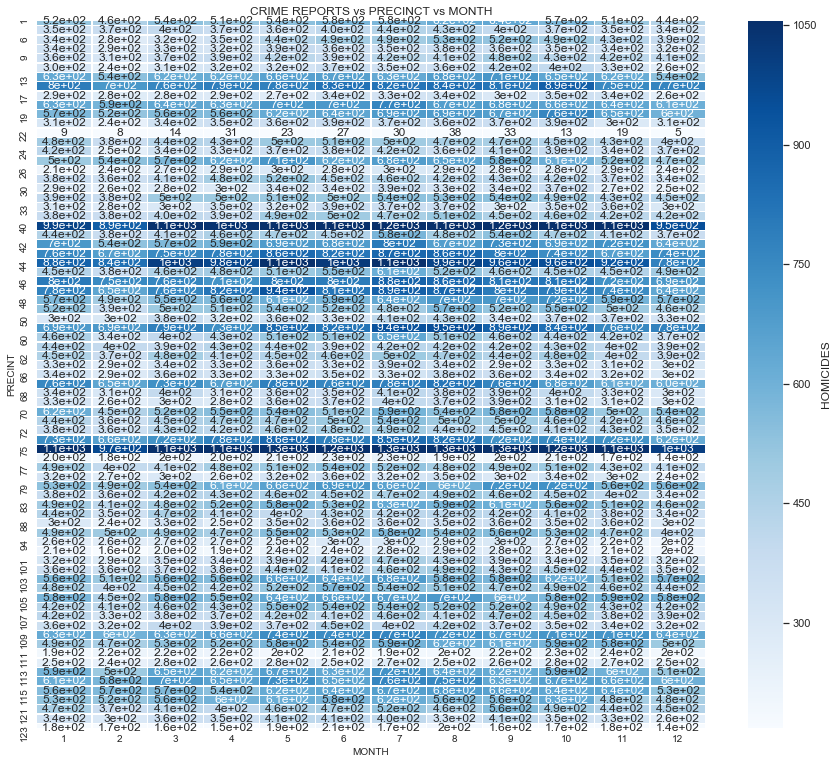

In [21]:
# Put corr df into the heatmap
fig, ax = plt.subplots(figsize=(15,13))
sns.set(font_scale=1)
sns.heatmap(corr.dropna(axis=0),
            annot=True,
            linewidths=0.3,
               cmap='Blues',
            robust=True,
           cbar_kws={'label': 'HOMICIDES'})
plt.title('CRIME REPORTS vs PRECINCT vs MONTH')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460745 entries, 125688 to 0
Data columns (total 30 columns):
CMPLNT_NUM          460745 non-null int64
PRECINT             460745 non-null int64
BOROUGH             460745 non-null object
DATE                460745 non-null datetime64[ns]
TIME                460745 non-null object
CMPLNT_TO_DT        402907 non-null datetime64[ns]
CMPLNT_TO_TM        403146 non-null object
CRM_ATPT_CPTD_CD    460745 non-null object
KY_CD               460745 non-null int64
OFFENSE LEVEL       460745 non-null object
OFNS_DESC           460733 non-null object
PATROL_BORO         460437 non-null object
PD_CD               460437 non-null float64
OFFENSE_NAME        460437 non-null object
RPT_DT              460745 non-null datetime64[ns]
SUSP_AGE_GROUP      351550 non-null object
SUSP_RACE           351550 non-null object
SUSP_SEX            351550 non-null object
VIC_AGE_GROUP       460742 non-null object
VIC_RACE            460742 non-null object
VIC_SEX

Text(0.5, 1.0, 'FELONY VS MISDEMEANOR VS VIOLATION')

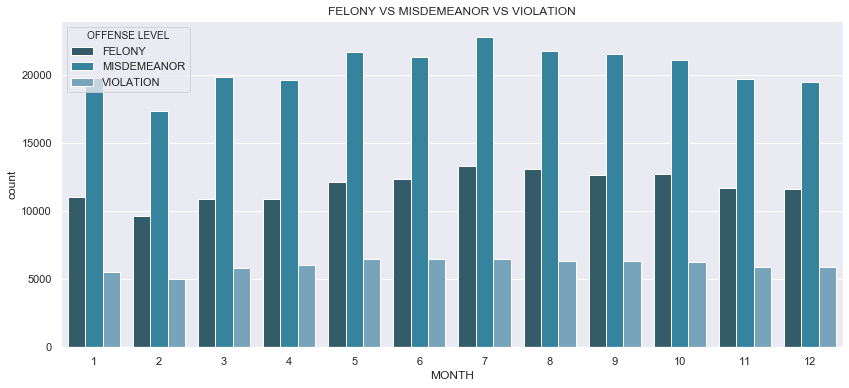

In [23]:
fig, ax = plt.subplots(figsize=(14,6))
crime_lvl = df[['MONTH','OFFENSE LEVEL']]
ax = sns.countplot(x="MONTH",
                   hue='OFFENSE LEVEL',
                   data=crime_lvl,
                   palette="PuBuGn_d")
plt.title('FELONY VS MISDEMEANOR VS VIOLATION')

#### Looks like misdemeanor is the top offense category of the crimes in NYC. This is better than having majority of the crimes to be felony. We can conclude tha majority of the violent crimes in NYC are misdemanor level crimes.

### Conclusion:

## Make a Map of Total Crimes per District in 2019

Text(0.5, 1, 'ALL CRIMES REPORTED PER BOROUGH 2019')

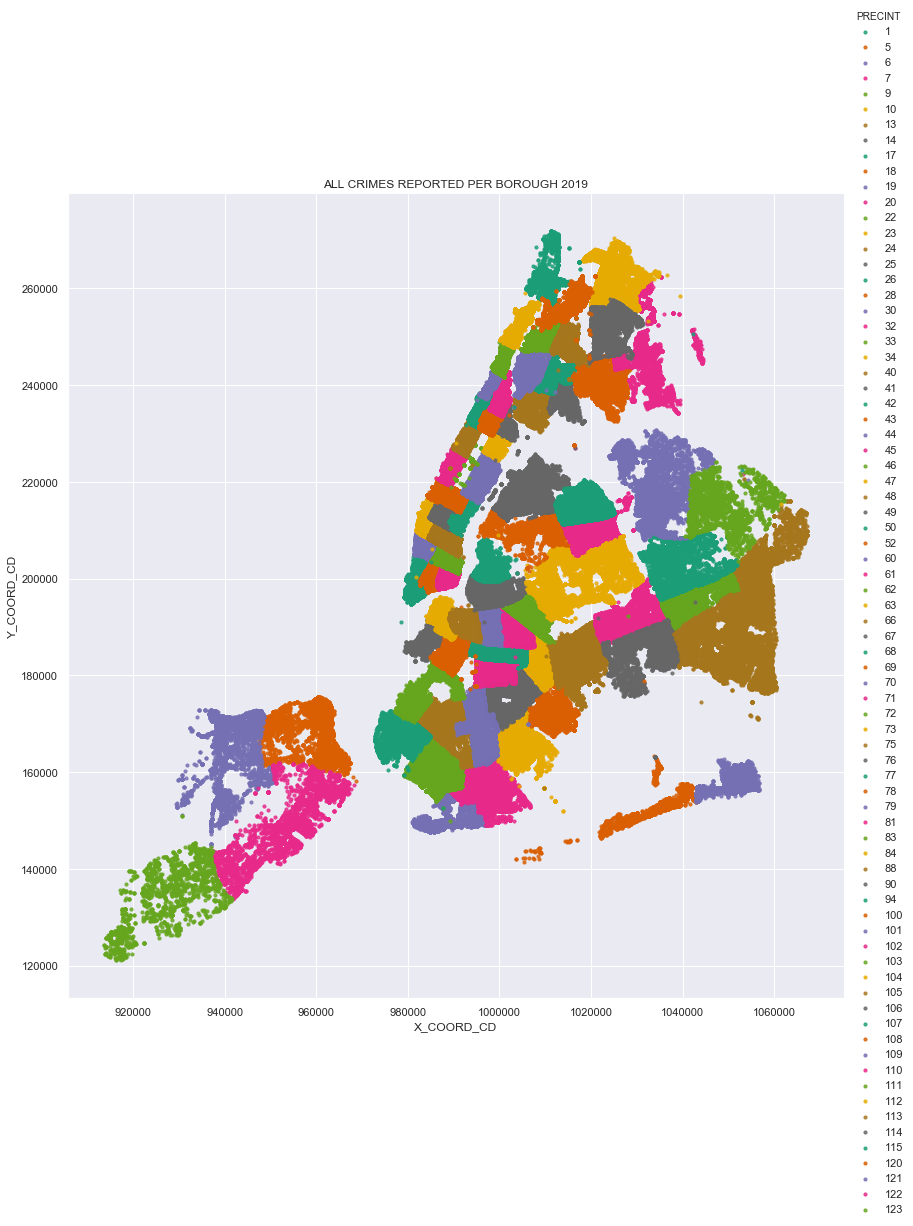

In [25]:
df_coord = df_2019.loc[(df_2019['X_COORD_CD']!=0)]


sns.lmplot('X_COORD_CD',
           'Y_COORD_CD',
           data=df_coord,
           fit_reg=False, 
           hue="PRECINT", 
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("ALL CRIMES REPORTED PER BOROUGH 2019")


## Make a Map of Top 10 Crimes in 2019 

Text(0.5, 1, 'ALL CRIMES REPORTED PER BOROUGH 2019')

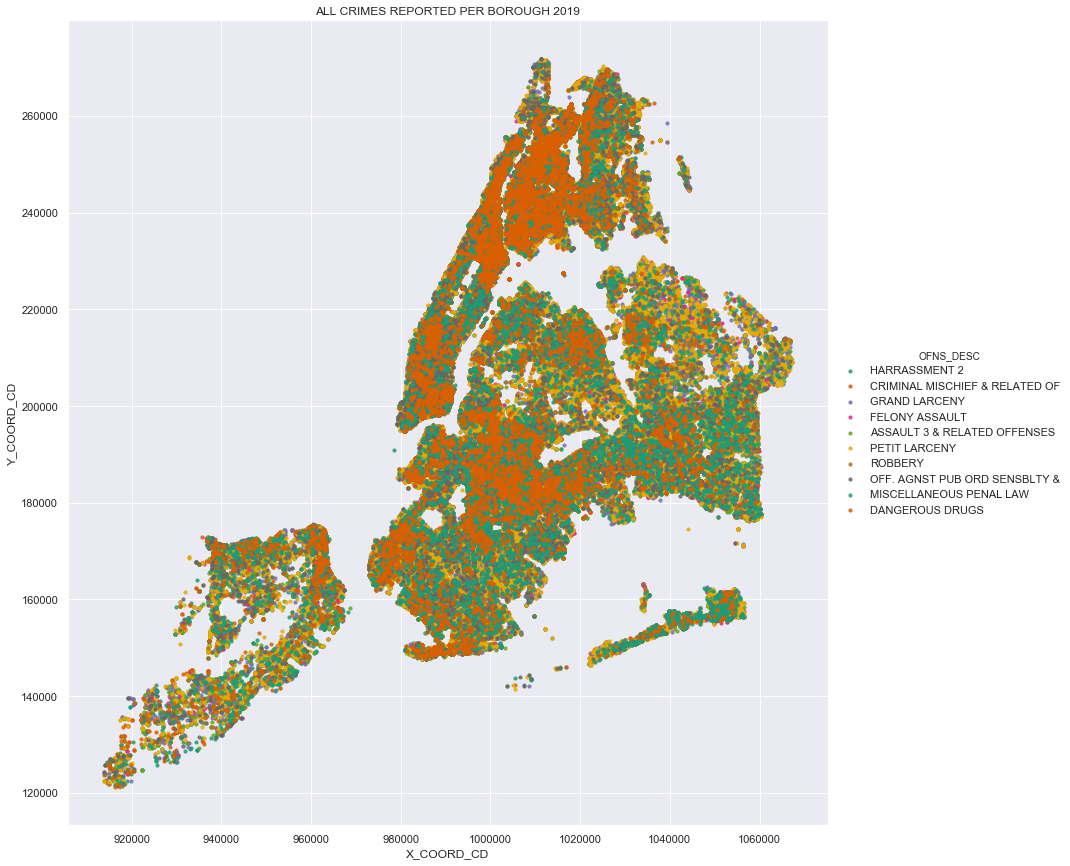

In [26]:
top_10_crimes = df_2019['OFNS_DESC'].value_counts()[:10].index.tolist()


df_crimes = df_2019.loc[df_2019['OFNS_DESC'].isin(top_10_crimes)]

sns.lmplot('X_COORD_CD',
           'Y_COORD_CD',
           data=df_crimes,
           fit_reg=False, 
           hue="OFNS_DESC", 
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10}) 
ax = plt.gca()
ax.set_title("ALL CRIMES REPORTED PER BOROUGH 2019")

